# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient


In [6]:

newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',language="en")
btc_headlines

{'status': 'ok',
 'totalResults': 6489,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': "Elon Musk reveals who bitcoin's creator Satoshi Nakamoto might be",
   'description': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency Bitcoin.\xa0"You can watch ideas evolve before Bitcoin was lau…',
   'url': 'https://techncruncher.blogspot.com/2021/12/elon-musk-reveals-who-bitcoins-creator.html',
   'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEik_48hPzMzsDzwfdUeHj4jNGqYGevEuVjTTPkAGTu9bRN3oePxV6bxF897GK8Az3AaSqUOalYXNG4HSCy0fW5KUHuruCWP8hAfZxgrgbzh-dsbLM9jxyFGCthOZdBCa1dNkqk6mrVl0VtflsV2VvKXfGnwL6-68m-mxp7qHJuLlvqGIahZ9YDe5mt97w=w1200-h630-p-k-no-nu',
   'publishedAt': '2021-12-29T20:41:00Z',
   'content': 'Musk.MARK RALSTON/AFP via Getty Images\r\nElon

In [8]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", 
                                          language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 2827,
 'articles': [{'source': {'id': 'business-insider',
    'name': 'Business Insider'},
   'author': 'prosen@insider.com (Phil Rosen)',
   'title': 'White Castle enters the crypto space with ethereum domain name and NFT',
   'description': 'Fast food giant White Castle has officially joined the crypto world by acquiring a ethereum domain name and replacing its Twitter avatar with an NFT.',
   'url': 'https://markets.businessinsider.com/news/currencies/white-castle-crypto-ethereum-domain-name-nft-twitter-profile-2021-12',
   'urlToImage': 'https://images2.markets.businessinsider.com/61b36fc70e2e8d001846a732?format=jpeg',
   'publishedAt': '2021-12-10T15:19:44Z',
   'content': 'White Castle double cheeseburger.Erin McDowell/Insider\r\nThe list of name brands getting into crypto grows.\xa0\r\nFast food chain White Castle announced on Twitter that it registered a domain name with th… [+1012 chars]'},
  {'source': {'id': 'business-insider', 'name': 'Busi

In [9]:
# Create the Bitcoin sentiment scores DataFrame
libra_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        libra_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": text
            
            
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(libra_sentiments)
btc_df.head()




,Compound,Positive,Negative,Neutral,text
0,0.3612,0.077,0.000,0.923,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca..."
2,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...
3,0.5859,0.142,0.000,0.858,Dec 23 (Reuters) - The U.S. Securities and Exc...
4,0.5267,0.112,0.000,0.888,People aren't done hijacking major politicians...


In [10]:
# Create the Ethereum sentiment scores DataFrame

libra_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        libra_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(libra_sentiments)
eth_df.head()


,text,Compound,Positive,Negative,Neutral
0,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000
1,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940
2,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.000,0.881
3,While people around the world still searched f...,0.3612,0.070,0.000,0.930
4,The wait is finally over. After a year-long de...,0.4019,0.155,0.115,0.729


In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.077185,0.052750,0.033750,0.913500
std,0.386299,0.071437,0.058288,0.086209
min,-0.796400,0.000000,0.000000,0.767000
25%,-0.010450,0.000000,0.000000,0.840250
50%,0.000000,0.000000,0.000000,0.922500
75%,0.385600,0.116250,0.065000,1.000000
max,0.790600,0.211000,0.233000,1.000000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.121635,0.048600,0.021950,0.929400
std,0.324656,0.069803,0.040455,0.083886
min,-0.584900,0.000000,0.000000,0.729000
25%,0.000000,0.000000,0.000000,0.888500
50%,0.000000,0.000000,0.000000,0.941000
75%,0.371375,0.086250,0.015000,1.000000
max,0.762000,0.225000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it'")
sw.append("'s")
sw.append("n't")
sw.append('…')
sw.append("\`")
sw.append('``')
sw.append('char')
sw.append("''")
sw = set(sw)

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens



In [16]:
# Create a new tokens column for Bitcoin
btc_df["tokens"] = btc_df.text.apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,0.3612,0.077,0.000,0.923,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,"[Musk.MARK, RALSTON/AFP, via, Getty, Images, E..."
1,-0.4019,0.000,0.078,0.922,"Image source, AFP via Getty Images\r\nImage ca...","[Image, source, AFP, via, Getty, Images, Image..."
2,0.0000,0.000,0.000,1.000,The plant opening northeast of Niagara Falls t...,"[plant, opening, northeast, Niagara, Falls, mo..."
3,0.5859,0.142,0.000,0.858,Dec 23 (Reuters) - The U.S. Securities and Exc...,"[Dec, 23, Reuters, U.S., Securities, Exchange,..."
4,0.5267,0.112,0.000,0.888,People aren't done hijacking major politicians...,"[People, done, hijacking, major, politician, T..."


In [18]:
# Create a new tokens column for Ethereum
eth_df["tokens"] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000,"[White, Castle, double, cheeseburger.Erin, McD..."
1,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940,"[Crypto, Street, Restaurant, Clearwater, Beach..."
2,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.000,0.881,"[Nicholas, Merten, expert, cryptography, predi..."
3,While people around the world still searched f...,0.3612,0.070,0.000,0.930,"[people, around, world, still, searched, infor..."
4,The wait is finally over. After a year-long de...,0.4019,0.155,0.115,0.729,"[wait, finally, year-long, delay, Xboxs, iconi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
N = 2
bit_grams = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(bit_grams).most_common(20)

[(('Reuters', 'Bitcoin'), 4),
 (('computer', 'scientist'), 4),
 (('inventor', 'bitcoin'), 4),
 (('former', 'business'), 4),
 (('Bitcoin', 'dropped'), 4),
 (('illustration', 'taken'), 3),
 (('scientist', 'claimed'), 3),
 (('claimed', 'inventor'), 3),
 (('bitcoin', 'largely'), 3),
 (('largely', 'prevailed'), 3),
 (('Florida', 'jury'), 3),
 (('jury', 'trial'), 3),
 (('trial', 'whether'), 3),
 (('whether', 'estate'), 3),
 (('estate', 'former'), 3),
 (('business', 'partner'), 3),
 (('partner', 'deserved'), 3),
 (('deserved', 'half'), 3),
 (('char', 'Posted'), 3),
 (('via', 'Getty'), 2)]

In [21]:
# Generate the Ethereum N-grams where N=2
N = 2
eth_grams = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(eth_grams).most_common(20)

[(('illustration', 'taken'), 4),
 (('Reuters', 'Bitcoin'), 4),
 (('Bitcoin', 'dropped'), 3),
 (('White', 'Castle'), 2),
 (('Crypto', 'Street'), 2),
 (('Clearwater', 'Beach'), 2),
 (('Beach', 'Florida'), 2),
 (('ul', 'li'), 2),
 (('/li', 'li'), 2),
 (('li', 'NFT'), 2),
 (('196', 'million'), 2),
 (('trading', 'platform'), 2),
 (('29', '2021'), 2),
 (('2021', 'REUTERS/Dado'), 2),
 (('char', 'representation'), 2),
 (('representation', 'virtual'), 2),
 (('virtual', 'cryptocurrency'), 2),
 (('cryptocurrency', 'Bitcoin'), 2),
 (('Bitcoin', 'seen'), 2),
 (('seen', 'picture'), 2)]

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
bit_tokens = tokenizer(btc_df.text.str.cat())
token_count(bit_tokens, 10)

[('char', 18),
 ('Bitcoin', 12),
 ('cryptocurrency', 8),
 ('bitcoin', 8),
 ('Reuters', 7),
 ('Twitter', 4),
 ('computer', 4),
 ('scientist', 4),
 ('inventor', 4),
 ('prevailed', 4)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(eth_df.text.str.cat())
token_count(eth_tokens, 10)

[('char', 20),
 ('Bitcoin', 9),
 ('2021', 6),
 ('cryptocurrency', 5),
 ('taken', 5),
 ('crypto', 4),
 ('bitcoin', 4),
 ('li', 4),
 ('illustration', 4),
 ('Reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [26]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

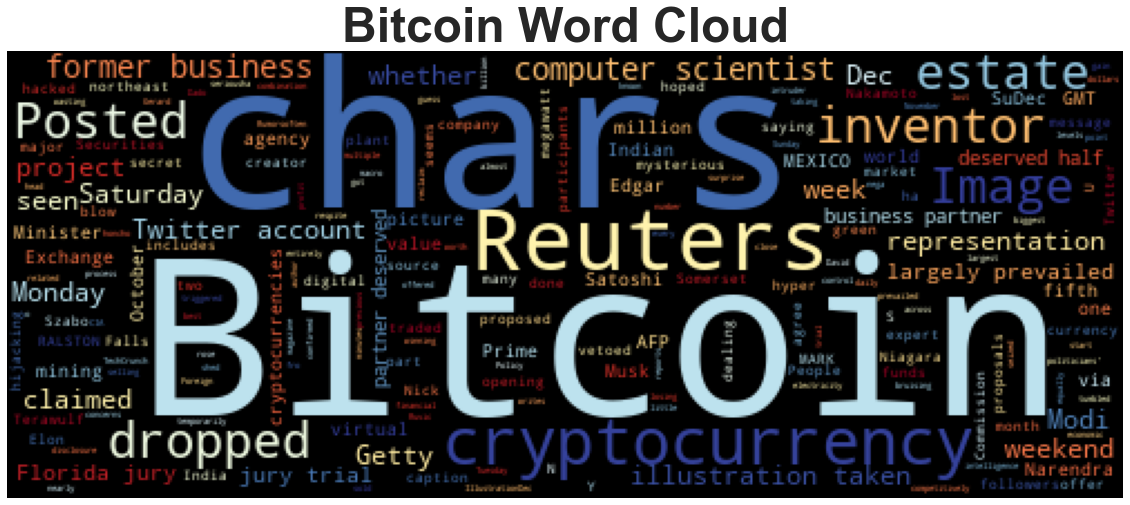

In [27]:
# Generate the Bitcoin word cloud
wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")

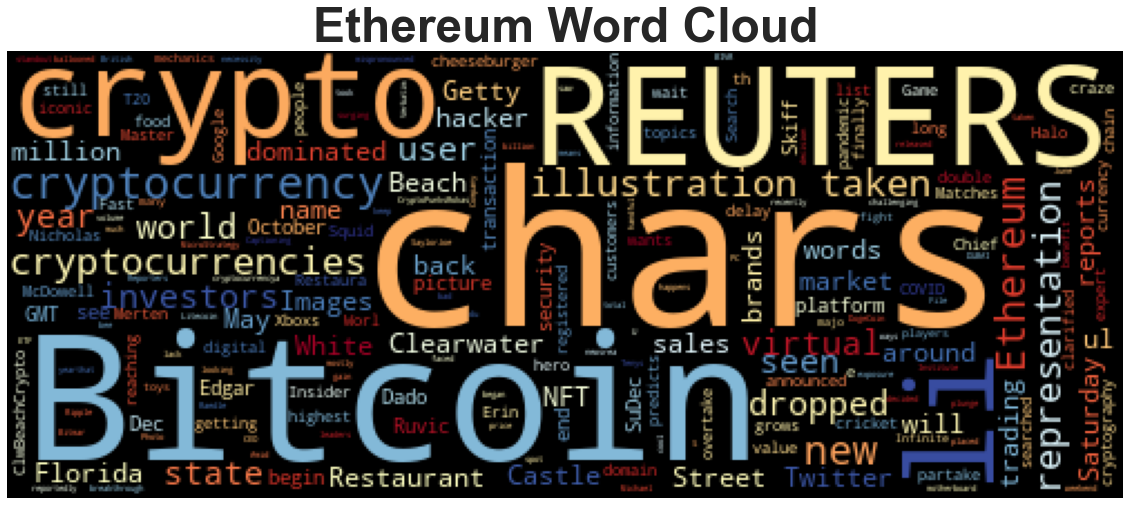

In [28]:
# Generate the Ethereum word cloud
wordcloud(eth_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 4.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df.text.str.cat()
btc_text

'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars]Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi\'s Twitter account was hacked with a message saying India ha… [+854 chars]The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars]Dec 23 (Reuters) - The U.S. Securities and Exchange Commission vetoed two proposals to offer bitcoin exchange-traded funds, dealing a blow to market participants who had hoped the agency would green … [+1769 chars]People aren\'t done hijacking major politicians\' Twitter accounts for financial gain. TechCrunch reports an intruder temporarily seized 

In [33]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [35]:
# List all Entities
for entry in doc.ents:
    print(entry.text, entry.label_)

Musk PERSON
MARK RALSTON PERSON
AFP ORG
Getty Images ORG
Elon Musk PERSON
Nick Szabo PERSON
Satoshi Nakamoto PERSON
AFP ORG
Getty Images ORG
Modi GPE
more than 70 million CARDINAL
Twitter PRODUCT
Indian NORP
Narendra Modi's PERSON
Twitter PRODUCT
India GPE
Niagara Falls PERSON
this month DATE
Somerset GPE
N.Y. GPE
$550 million MONEY
Terawulf PERSON
150-megawatt QUANTITY
23 CARDINAL
Reuters ORG
The U.S. Securities and Exchange Commission ORG
two CARDINAL
Twitter WORK_OF_ART
TechCrunch ORG
Indian NORP
Narendra Modi's PERSON
Twitter PERSON
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
IllustrationDec ORG
12 CARDINAL
Reuters ORG
Sunday DATE
above $50,000 MONEY
Monday DATE
Florida GPE
half CARDINAL
October 19, 2021 DATE
REUTERS ORG
Edgar SuDec 28 PERSON
Reuters ORG
6.13% PERCENT
Tuesday DATE
+473 ORG
4 DATE
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 GMT TIME
Saturday DATE
4,514.87 MONEY
28.7% PERCENT
fifth ORDINAL
Saturday DATE
nearly a billion dollars MONEY
October 19, 2021 DATE

---

### Ethereum NER

In [36]:
# Concatenate all of the Ethereum text together
eth_text = eth_df.text.str.cat()
eth_text 

'White Castle double cheeseburger.Erin McDowell/Insider\r\nThe list of name brands getting into crypto grows.\xa0\r\nFast food chain White Castle announced on Twitter that it registered a domain name with th… [+1012 chars]Crypto Street Restaurant, Clearwater Beach, Florida.@ClwBeachCrypto/Twitter\r\nA new restaurant in Clearwater Beach, Florida wants more customers to partake in the crypto craze.\r\nCrypto Street Restaura… [+2203 chars]Nicholas Merten , an expert in cryptography, predicts that the digital currency ethereum will overtake bitcoin in the market after reaching its highest value since May 2018. He clarified that these e… [+769 chars]While people around the world still searched for information about the COVID-19 pandemic, other topics dominated Google\'s Year in Search for 2021 like cricket and Squid Game. Matches for the T20 Worl… [+2053 chars]The wait is finally over. After a year-long delay, Xboxs iconic hero, Master Chief, is back. With Halo Infinite, there are new toys 

In [38]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [39]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [40]:
# List all Entities
for entry in eth_doc.ents:
    print(entry.text, entry.label_)

White Castle ORG
Erin McDowell PERSON
White Castle ORG
Twitter WORK_OF_ART
Clearwater Beach PERSON
Florida.@ClwBeachCrypto/Twitter
 ORG
Clearwater Beach GPE
Florida GPE
Merten PERSON
May 2018 DATE
Google ORG
2021 DATE
Worl PERSON
year-long DATE
Xboxs ORG
Michael SaylorJoe Raedle PERSON
ETF ORG
NFT ORG
a breakthrough year DATE
$14 billion MONEY
2021.</li><li CARDINAL
NFT ORG
U.S. Captioning Company ORG
the British Institute of Verbatim ORG
Bitcoin ORG
Saturday DATE
the weekend DATE
$196 million MONEY
Bitmar PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/File Photo ORG
DUBAI PERSON
Dec 20 DATE
chars]In early December 2021 DATE
Skiff ORG
MetaMask PRODUCT
Skiff ORG
Ethereum PERSON
October 19, 2021 DATE
REUTERS ORG
Edgar SuDec 4 PERSON
Reuters ORG
9.29% PERCENT
48,752.15 MONEY
GMT WORK_OF_ART
4 CARDINAL
Reuters ORG
8.4% PERCENT
49,228.82 MONEY
20:01 GMT TIME
Saturday DATE
4,514.87 MONEY
28.7% PERCENT
November 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
IllustrationDec ORG
12 CARDINAL
Reut

---